### General Overview of Dataframe

In [2]:
import numpy as np
import pandas as pd
import os
print(os.listdir('../separated_jobs'))

['.ipynb_checkpoints', '3d_specialist.csv', 'academic_professor.csv', 'ai_engineer.csv', 'analyst_roles.csv', 'app_developer.csv', 'artificial_intelligence_researcher.csv', 'automation_engineer.csv', 'backend-developer.csv', 'blockchain_developer.csv', 'business_analyst.csv', 'c#_developer.csv', 'c++_developer.csv', 'cloud_engineer.csv', 'content_writer.csv', 'cybersecurity_specialist.csv', 'data_analyst.csv', 'data_base_administrator.csv', 'data_scientist.csv', 'developer_roles.csv', 'devops_engineer.csv', 'digital_marketing_specialist.csv', 'electronics_engineer.csv', 'firmware_engineer.csv', 'freelancer.csv', 'front-end_developer.csv', 'full-stack_developer.csv', 'game_developer.csv', 'graphics_designer.csv', 'hardware_engineer.csv', 'integration_engineer.csv', 'it_specialist.csv', 'java_developer.csv', 'lead_engineer.csv', 'machine_learning_engineer.csv', 'manager_roles.csv', 'mechanical_engineer.csv', 'network_engineer.csv', 'other.csv', 'product_manager.csv', 'python_developer.cs

In [3]:
df_blockchain = pd.read_csv('../separated_jobs/blockchain_developer.csv')

In [4]:
display(df_blockchain.head())

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,petition.io,Blockchain Developer,Remote,0.0,"CI/CD, CSS, Software deployment, DevOps, Git",NaN,Blockchain Developer
1,Polygon,Blockchain Developer - Integration & Support,Remote,0.0,"Git, JavaScript, SDKs, Computer networking",3.3,Blockchain Developer
2,Vegavid Technology,Blockchain Developer,Remote,0.0,"Node.js, React, Machine learning",4.9,Blockchain Developer
3,Appson Technologies,Blockchain Developer,Remote,250000.0,"MongoDB, Microservices, AWS, Software developm...",NaN,Blockchain Developer
4,nPlus technologies,Blockchain Developer,Coimbatore,4800000.0,Encryption,4.4,Blockchain Developer


### Handling Null Values

In [6]:
display(df_blockchain.isnull().sum())

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    9
company_rating           43
standardized_job_role     0
dtype: int64

In [7]:
display(df_blockchain[df_blockchain['salary_pa'] == 0])

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,petition.io,Blockchain Developer,Remote,0.0,"CI/CD, CSS, Software deployment, DevOps, Git",NaN,Blockchain Developer
1,Polygon,Blockchain Developer - Integration & Support,Remote,0.0,"Git, JavaScript, SDKs, Computer networking",3.3,Blockchain Developer
2,Vegavid Technology,Blockchain Developer,Remote,0.0,"Node.js, React, Machine learning",4.9,Blockchain Developer
6,Shamlatech,Blockchain Developer,India,0.0,"Go, Node.js, Kubernetes, AWS, APIs",3.7,Blockchain Developer
9,WebMantra Technologies,Blockchain Developer,India,0.0,"Node.js, Git, Java, Database design, Project m...",3.9,Blockchain Developer
16,Polygon,Blockchain Growth Specialist,Remote,0.0,"SDKs, Communication skills",3.3,Blockchain Developer
21,Isotropic Solution Pvt Ltd,Sr. Blockchain Developer,Remote,0.0,NaN,NaN,Blockchain Developer
29,Technorizen Software,Blockchain Developers,Indore,0.0,NaN,4.7,Blockchain Developer
34,Helius Technologies,Blockchain/Solidity Developer,India,0.0,"Node.js, React, English, JavaScript, SDKs",4.2,Blockchain Developer
36,Polygon,Enterprise Blockchain,Remote,0.0,"SDKs, Communication skills",3.3,Blockchain Developer


In [8]:
df_blockchain = df_blockchain.drop_duplicates()

In [9]:
df_blockchain['salary_pa'] = df_blockchain['salary_pa'].astype(float) / 100000
df_blockchain.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [10]:
df_blockchain['company_rating'] = df_blockchain['company_rating'].fillna(0)

In [11]:
avg_salary_by_rating = df_blockchain[df_blockchain['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()

In [12]:


def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0 or pd.isna(row['salary_lpa']):  
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  
            return avg_salary_by_rating[rating]
        else:  
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  

df_blockchain['salary_lpa'] = df_blockchain.apply(
    lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1
)


### Salary Distribution On the Basis of Skills

In [14]:

df_blockchain['skills'] = df_blockchain['skills'].str.split(',\s*')


df_skills = df_blockchain.explode('skills')
df_skills = df_skills.drop_duplicates().reset_index(drop = True)


In [15]:
display(df_skills)

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,petition.io,Blockchain Developer,Remote,6.645143,CI/CD,0.0,Blockchain Developer
1,petition.io,Blockchain Developer,Remote,6.645143,CSS,0.0,Blockchain Developer
2,petition.io,Blockchain Developer,Remote,6.645143,Software deployment,0.0,Blockchain Developer
3,petition.io,Blockchain Developer,Remote,6.645143,DevOps,0.0,Blockchain Developer
4,petition.io,Blockchain Developer,Remote,6.645143,Git,0.0,Blockchain Developer
...,...,...,...,...,...,...,...
506,Ultimez,Blockchain Breaking News Correspondent,Remote,14.000000,Google Docs,4.0,Blockchain Developer
507,Ultimez,Blockchain Breaking News Correspondent,Remote,14.000000,WordPress,4.0,Blockchain Developer
508,Ultimez,Blockchain Breaking News Correspondent,Remote,14.000000,Spark,4.0,Blockchain Developer
509,Ultimez,Blockchain Breaking News Correspondent,Remote,14.000000,Public speaking,4.0,Blockchain Developer


In [16]:
import seaborn as sns
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills


df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]

C:\Users\rhyth\AppData\Local\Temp\ipykernel_13156\3667392867.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


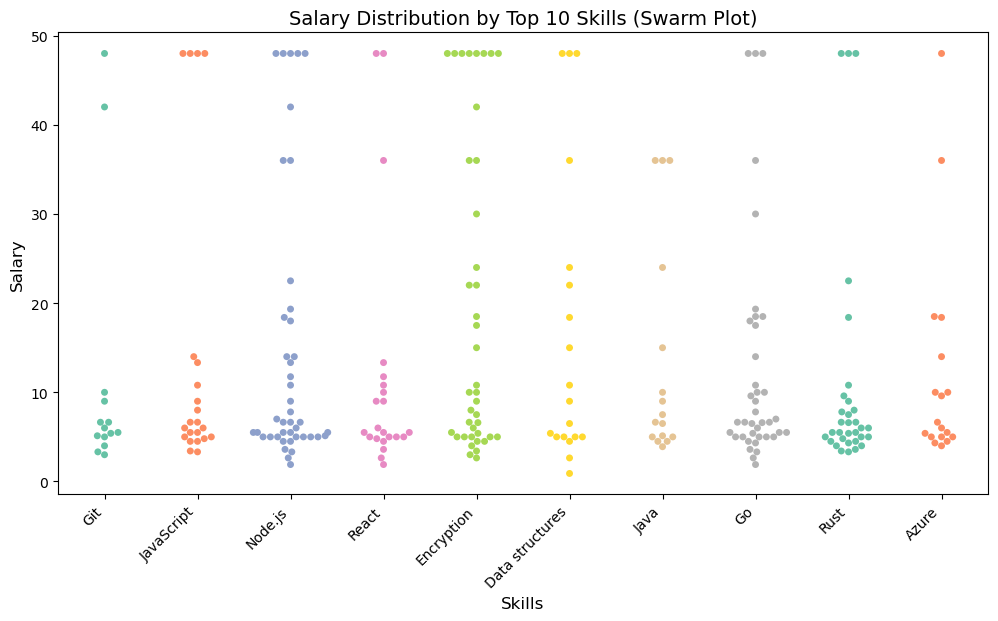

In [17]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title("Salary Distribution by Top 10 Skills (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

In [18]:
display(df_blockchain)

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,petition.io,Blockchain Developer,Remote,6.645143,"[CI/CD, CSS, Software deployment, DevOps, Git]",0.0,Blockchain Developer
1,Polygon,Blockchain Developer - Integration & Support,Remote,3.320000,"[Git, JavaScript, SDKs, Computer networking]",3.3,Blockchain Developer
2,Vegavid Technology,Blockchain Developer,Remote,48.000000,"[Node.js, React, Machine learning]",4.9,Blockchain Developer
3,Appson Technologies,Blockchain Developer,Remote,2.500000,"[MongoDB, Microservices, AWS, Software develop...",0.0,Blockchain Developer
4,nPlus technologies,Blockchain Developer,Coimbatore,48.000000,[Encryption],4.4,Blockchain Developer
...,...,...,...,...,...,...,...
117,Oracle,Senior Member of Technical Staff - Oracle Bloc...,Bengaluru,18.000000,"[Performance tuning, Oracle, Go, Node.js, Kube...",3.8,Blockchain Developer
118,Kriscent Techno Hub,NFT Creator,Kota,22.015000,[Encryption],4.6,Blockchain Developer
119,iHub Anubhuti - IIITD Foundation,Block Chain Engineer,Guwahati,6.645143,"[Azure, Rust, Go, Google Cloud Platform, AWS]",0.0,Blockchain Developer
120,Helius Technologies,BLOCKCHAIN RESEARCH ENGINEER,India,30.000000,"[Go, Encryption, Research, C++, C]",4.2,Blockchain Developer


In [19]:

all_skills = [skill for sublist in df_blockchain['skills'].dropna() for skill in sublist]
df_blockchain.head()

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,petition.io,Blockchain Developer,Remote,6.645143,"[CI/CD, CSS, Software deployment, DevOps, Git]",0.0,Blockchain Developer
1,Polygon,Blockchain Developer - Integration & Support,Remote,3.320000,"[Git, JavaScript, SDKs, Computer networking]",3.3,Blockchain Developer
2,Vegavid Technology,Blockchain Developer,Remote,48.000000,"[Node.js, React, Machine learning]",4.9,Blockchain Developer
3,Appson Technologies,Blockchain Developer,Remote,2.500000,"[MongoDB, Microservices, AWS, Software develop...",0.0,Blockchain Developer
4,nPlus technologies,Blockchain Developer,Coimbatore,48.000000,[Encryption],4.4,Blockchain Developer


In [20]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


         Skill  Count
8      Node.js     43
16  Encryption     40
21          Go     39
30        Rust     32
5   JavaScript     22
..         ...    ...
69      MATLAB      1
70    Power BI      1
71   Waterfall      1
72           R      1
98  Recruiting      1

[99 rows x 2 columns]


### Most Demanding Skills

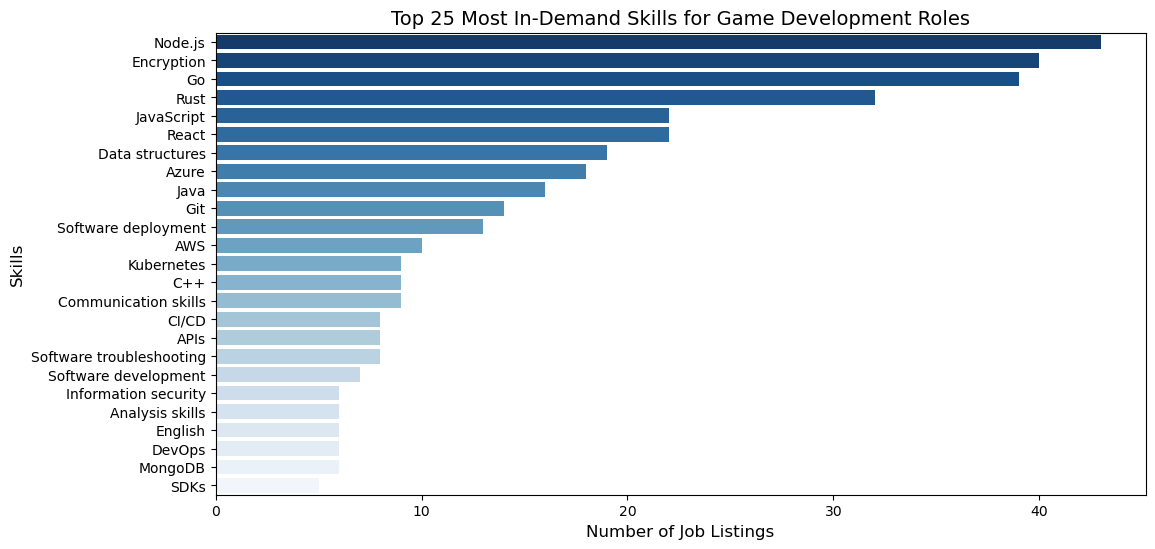

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title("Top 25 Most In-Demand Skills for Game Development Roles", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()

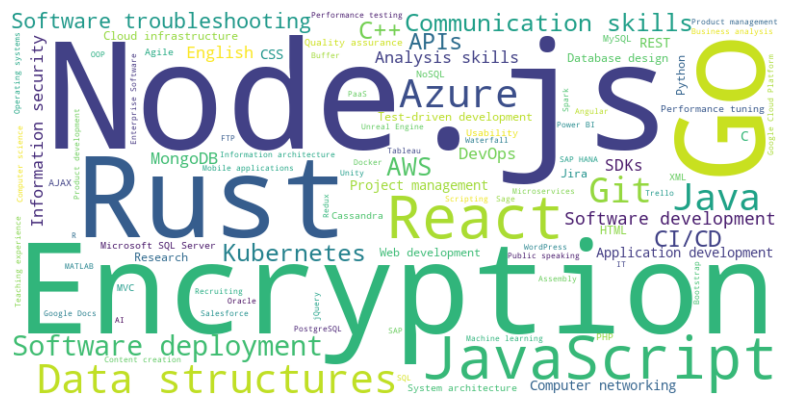

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### High Paying Companies

In [25]:
top_companies = df_blockchain.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))

                  company_name  salary_lpa
25       Exioms Theory (P) Ltd        48.0
9              Brain Inventory        48.0
89          Vegavid Technology        48.0
67                   Secninjaz        48.0
39                    Keyutech        48.0
16   ClassHose India Pvt. Ltd.        48.0
15          Clarisco Solutions        48.0
62               Rain Infotech        48.0
14                       ClanX        48.0
100               [x]cube LABS        48.0


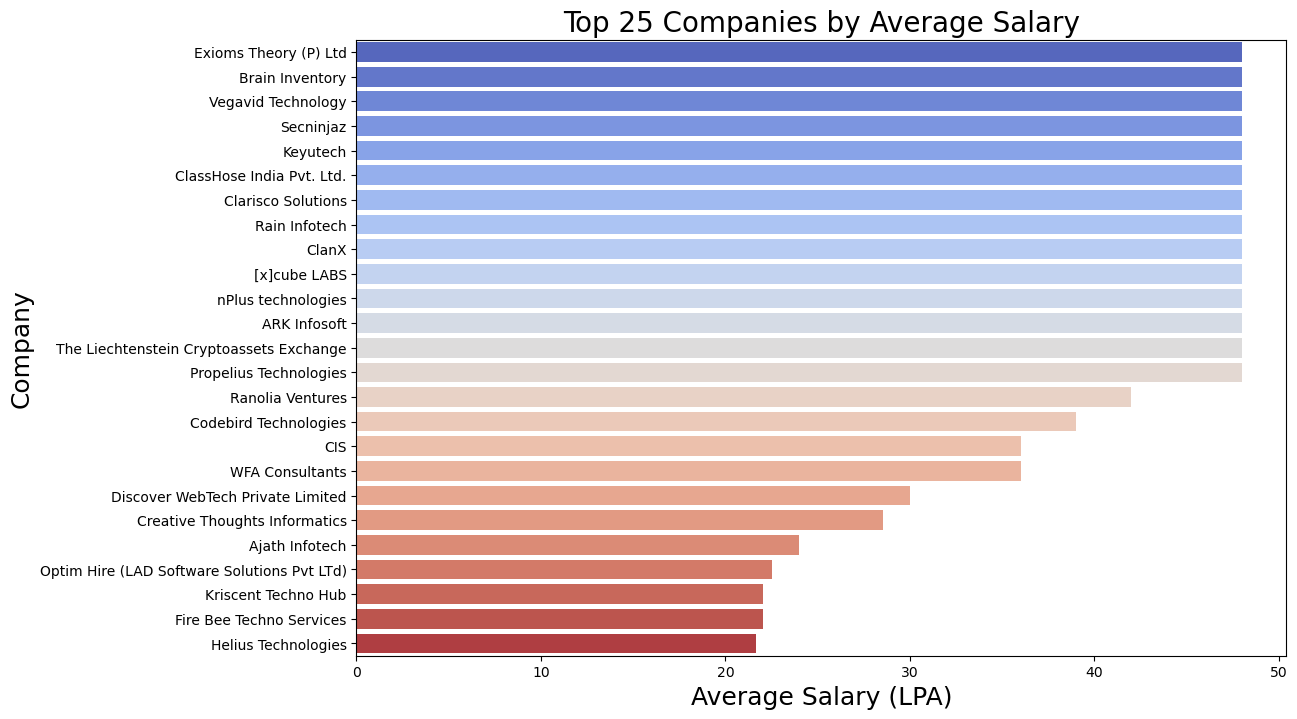

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title("Top 25 Companies by Average Salary", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Total Salary VS Location

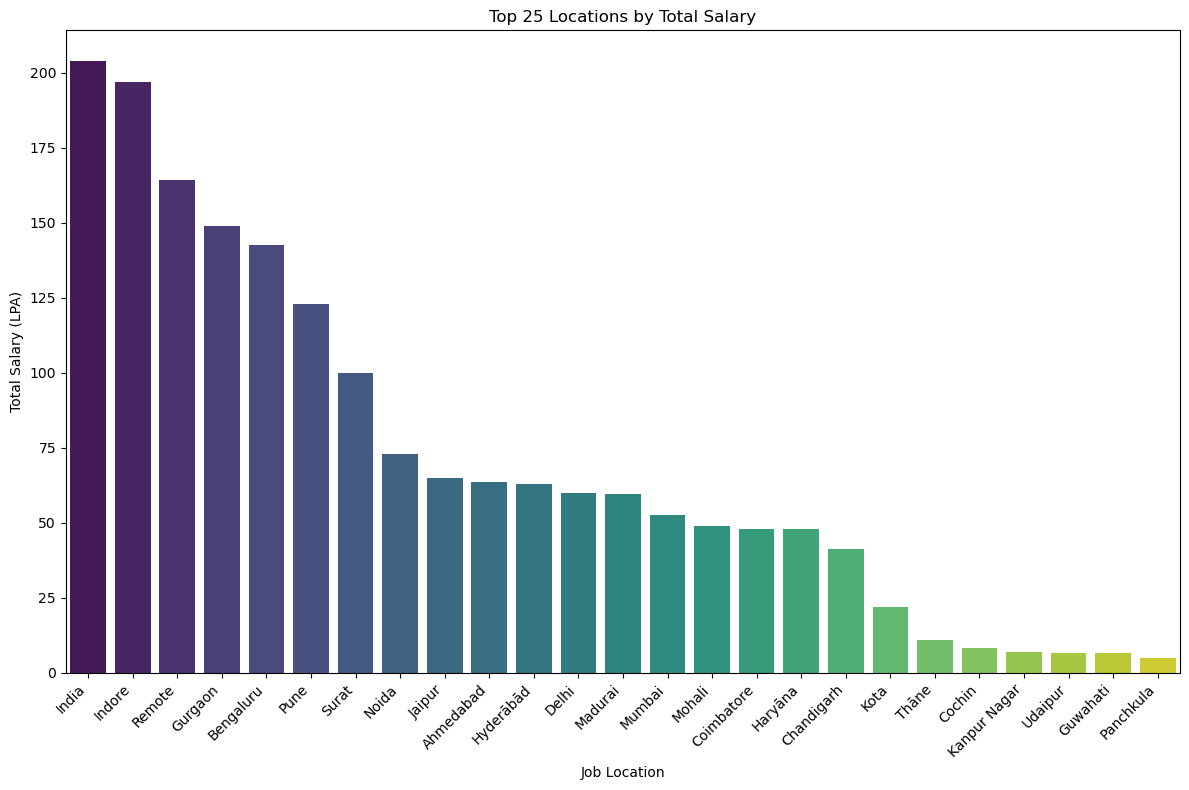

In [28]:
salary_by_location = df_blockchain.groupby('job_location')['salary_lpa'].sum()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title('Top 25 Locations by Total Salary')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

### Number of jobs VS Location

In [30]:
job_count_by_location = df_blockchain['job_location'].value_counts()


top_locations = job_count_by_location.head(25)

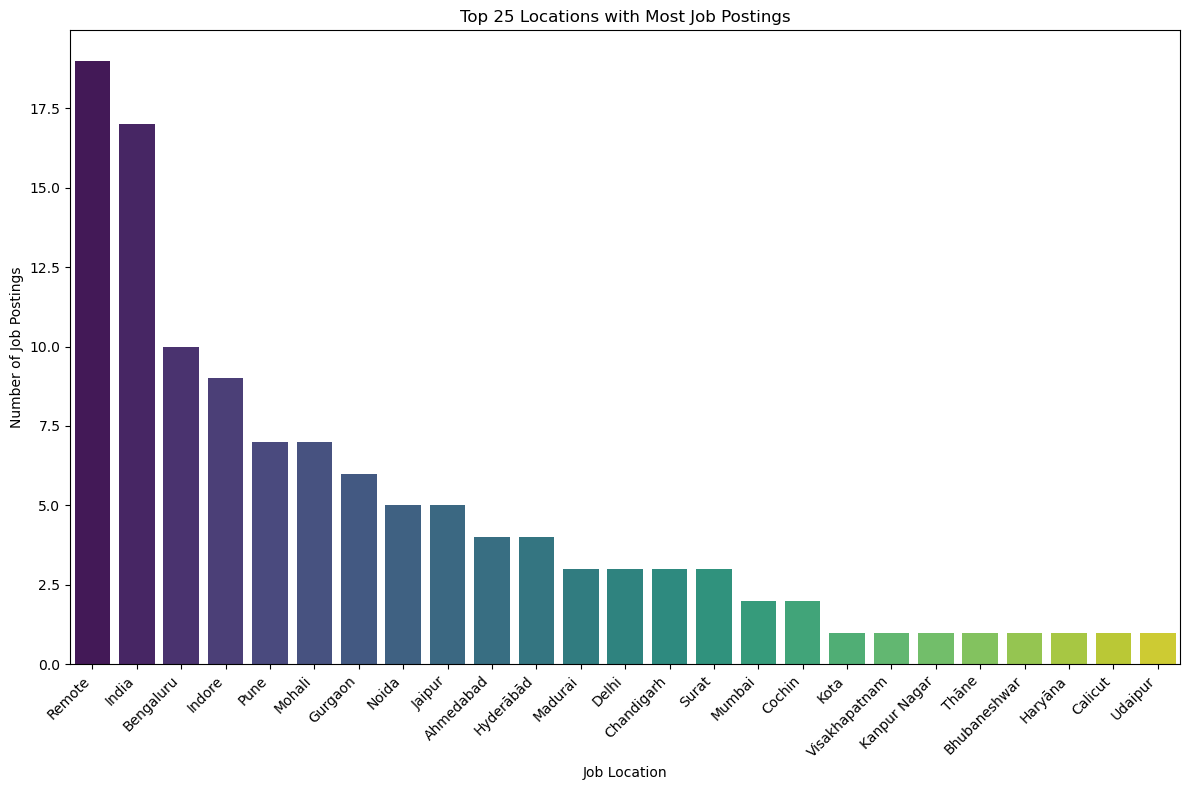

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Number of Job Postings')
plt.title('Top 25 Locations with Most Job Postings')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

### Highest Paying Job Roles

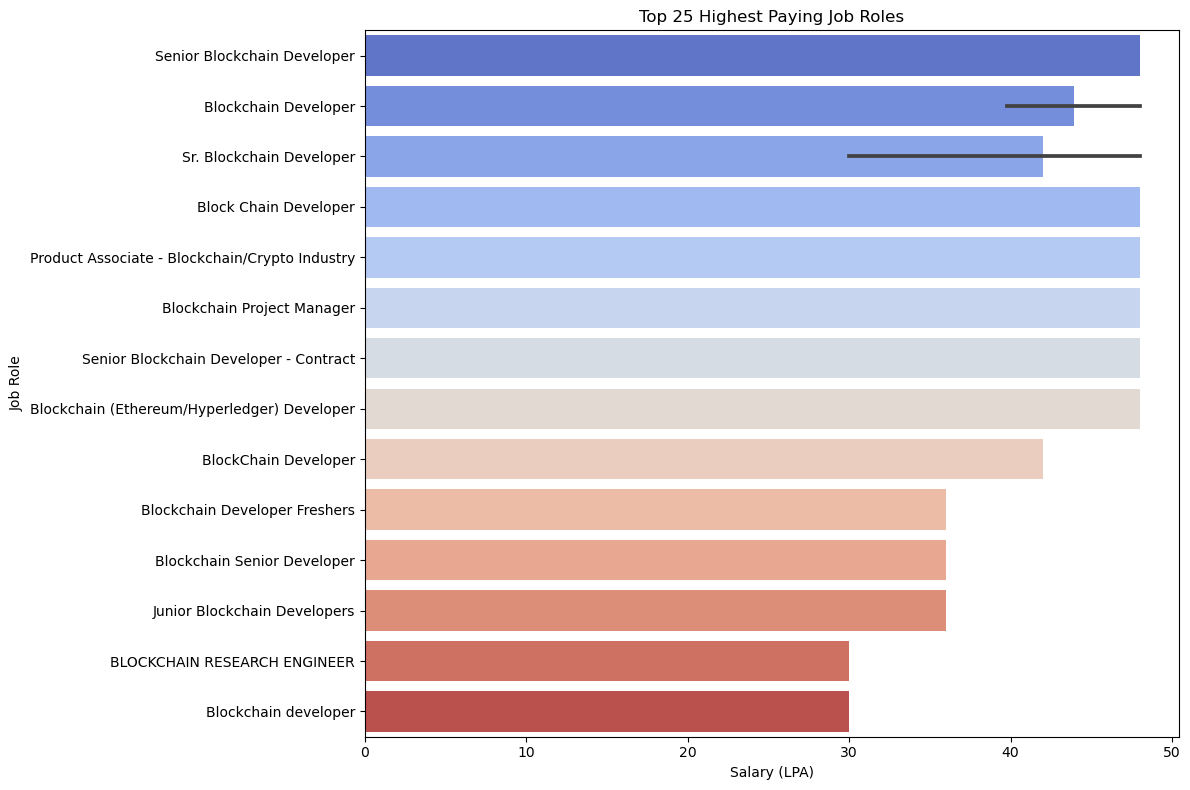

In [33]:
top_roles_by_salary = df_blockchain[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm')


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title('Top 25 Highest Paying Job Roles')


plt.tight_layout()
plt.show()

### Salary Distribution Curves

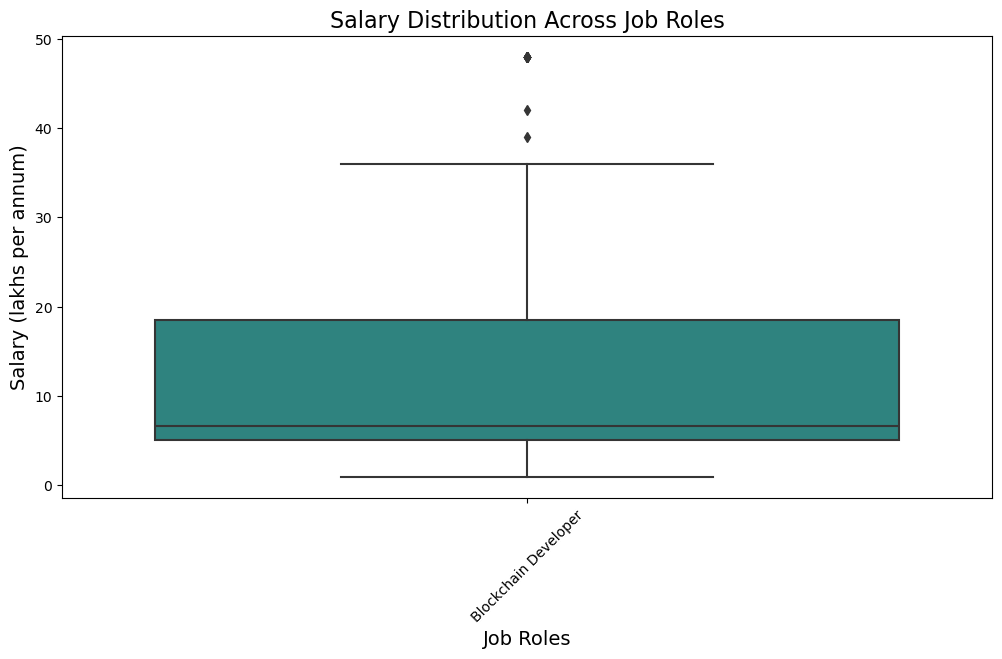

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


df_blockchain_clean = df_blockchain[df_blockchain['salary_lpa'] > 0]


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_blockchain_clean,
    x='standardized_job_role',
    y='salary_lpa',
    palette='viridis'
)
plt.title('Salary Distribution Across Job Roles', fontsize=16)
plt.xlabel('Job Roles', fontsize=14)
plt.ylabel('Salary (lakhs per annum)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


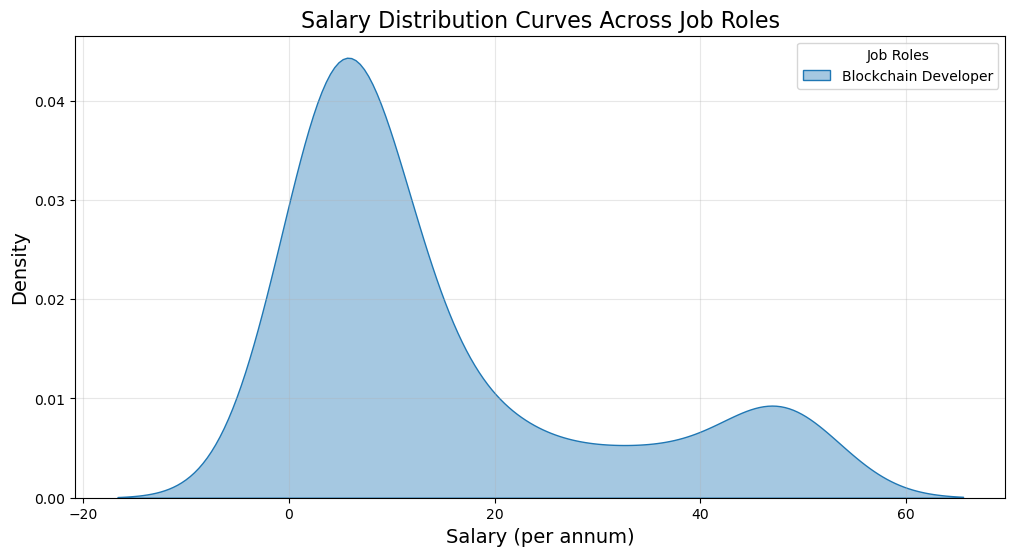

In [36]:

df_blockchain_clean = df_blockchain[df_blockchain['salary_lpa'] > 0]


plt.figure(figsize=(12, 6))


for role in df_blockchain_clean['job_role'].unique():
    sns.kdeplot(
        data=df_blockchain_clean[df_blockchain_clean['standardized_job_role'] == role],
        x='salary_lpa',
        label=role,
        fill=True,  
        alpha=0.4  
    )


plt.title('Salary Distribution Curves Across Job Roles', fontsize=16)
plt.xlabel('Salary (per annum)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title="Job Roles", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


### Company Rating VS Average Salary

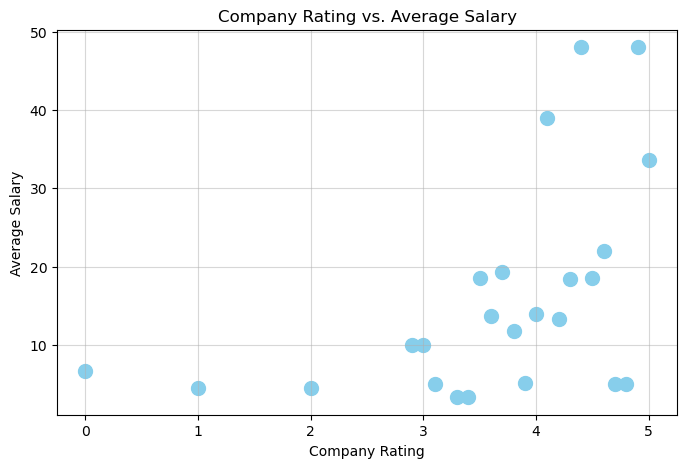

In [38]:
rating_avg_salary = df_blockchain.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title('Company Rating vs. Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()

### Remote VS On-site

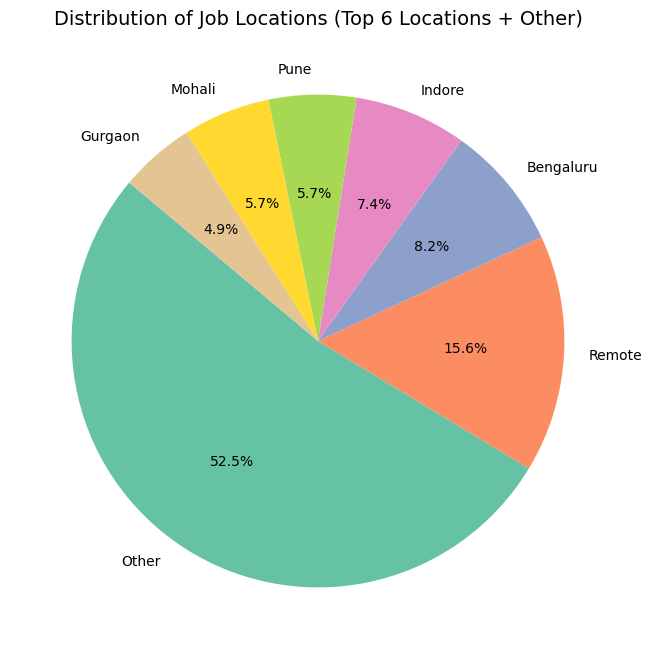

In [40]:

location_counts = df_blockchain[df_blockchain['job_location'] != 'India']['job_location'].value_counts()


top_locations = location_counts.head(6).index


df_blockchain['job_location_grouped'] = df_blockchain['job_location'].apply(lambda x: x if x in top_locations else 'Other')


location_grouped_counts = df_blockchain['job_location_grouped'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))


plt.title("Distribution of Job Locations (Top 6 Locations + Other)", fontsize=14)


plt.show()